#### import

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

#### 학습결과 시각화 함수

In [2]:
def plot_loss(epochs, history):
    """
    학습 loss를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()    

In [3]:
def plot_accuracy(epochs, history):
    """
    학습 Accuracy를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], 
                                                 label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()  

#### 데이터 로딩

In [4]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [5]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

#### 하이퍼파라미터 변수 정의

In [6]:
LEARNING_RATE = 0.001 # 학습률 - optimizer에 설정
N_EPOCHS = 20         # 에폭수
N_BATCHS = 100        # batch size

# train/test 데이터의 개수를 변수 정의
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

#### 전처리
- image : 0 ~ 1 사이의 값으로 정규화
- label : one hot encoding (다중분류문제이므로)

In [7]:
X_train = (train_image).astype("float32")/255.0
X_test = (test_image).astype('float32')/255.0

In [8]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [9]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(0.0, 1.0, 0.0, 1.0)

In [10]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

#### Dataset 생성

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

# 모델의 크기 변경

#### 작은 모델

In [12]:
def create_small_model():
    #모델생성
    model = keras.Sequential()
    # 레이어 추가 - Hidden
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=1, activation='relu'))
    # 출력레이어 - 다중분류: unit수 - 클래스수, activation-softmax
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [13]:
# 모델 생성, 컴파일
small_model =  create_small_model()
small_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [14]:
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


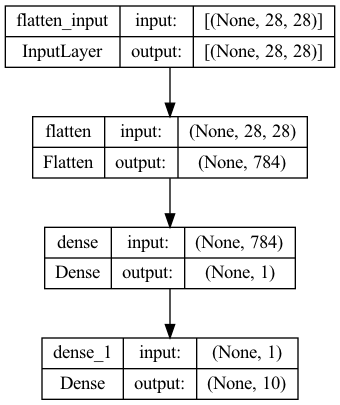

In [15]:
keras.utils.plot_model(small_model, show_shapes=True)

In [16]:
hist = small_model.fit(train_dataset, epochs=N_EPOCHS, 
                       validation_data=test_dataset)

Epoch 1/20
  8/600 [..............................] - ETA: 4s - loss: 2.3041 - accuracy: 0.0862  

2022-07-15 10:34:41.519914: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-15 10:34:41.520049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 2.0981 - accuracy: 0.1922

2022-07-15 10:34:45.992008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 5s 8ms/step - loss: 2.0981 - accuracy: 0.1922 - val_loss: 1.9758 - val_accuracy: 0.2240
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 1.9096 - accuracy: 0.2301 - val_loss: 1.8601 - val_accuracy: 0.2478
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 1.8248 - accuracy: 0.2455 - val_loss: 1.7992 - val_accuracy: 0.2550
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 1.7779 - accuracy: 0.2595 - val_loss: 1.7630 - val_accuracy: 0.2738
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 1.7476 - accuracy: 0.2717 - val_loss: 1.7367 - val_accuracy: 0.2688
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 1.7259 - accuracy: 0.2754 - val_loss: 1.7191 - val_accuracy: 0.2709
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 1.7098 - accuracy: 0.2796 - val_loss: 1.7028 - val_accuracy: 0.2833
Epoch 8/20
600/60

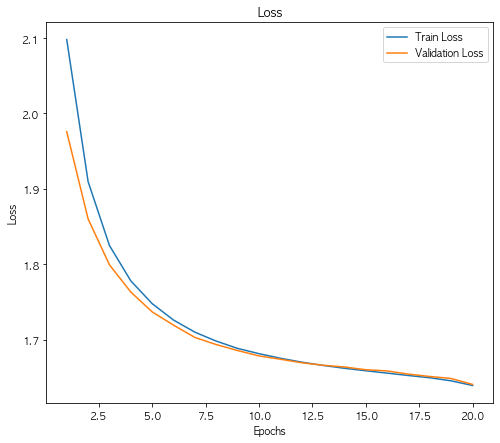

In [17]:
plot_loss(N_EPOCHS, hist)

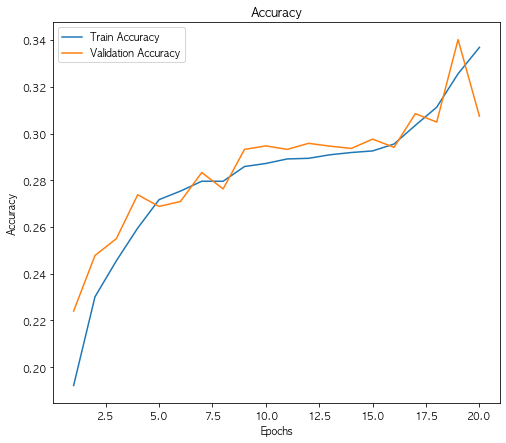

In [18]:
plot_accuracy(N_EPOCHS, hist)

#### 모델의 크기를 크게

In [19]:
def create_bigger_model():
    model = keras.Sequential()
    #은닉층
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    #출력층
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [20]:
bigger_model = create_bigger_model()
bigger_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [21]:
bigger_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-tr

In [22]:
hist = bigger_model.fit(train_dataset, 
                        epochs=N_EPOCHS, 
                        validation_data=test_dataset)

Epoch 1/20
  7/600 [..............................] - ETA: 5s - loss: 2.0953 - accuracy: 0.3871  

2022-07-15 10:36:16.651016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


597/600 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.9246

2022-07-15 10:36:21.518574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 6s 9ms/step - loss: 0.2491 - accuracy: 0.9248 - val_loss: 0.1244 - val_accuracy: 0.9602
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0957 - accuracy: 0.9708 - val_loss: 0.0871 - val_accuracy: 0.9750
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0719 - val_accuracy: 0.9774
Epoch 4/20
600/600 [==============================] - 6s 11ms/step - loss: 0.0496 - accuracy: 0.9839 - val_loss: 0.0904 - val_accuracy: 0.9729
Epoch 5/20
600/600 [==============================] - 6s 11ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0883 - val_accuracy: 0.9762
Epoch 6/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0751 - val_accuracy: 0.9788
Epoch 7/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0731 - val_accuracy: 0.9802
Epoch 8/20
60

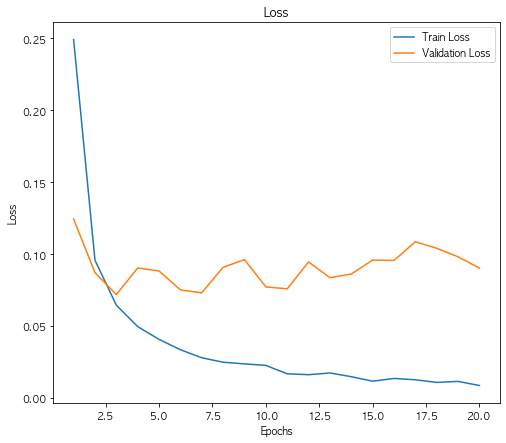

In [23]:
plot_loss(N_EPOCHS, hist)

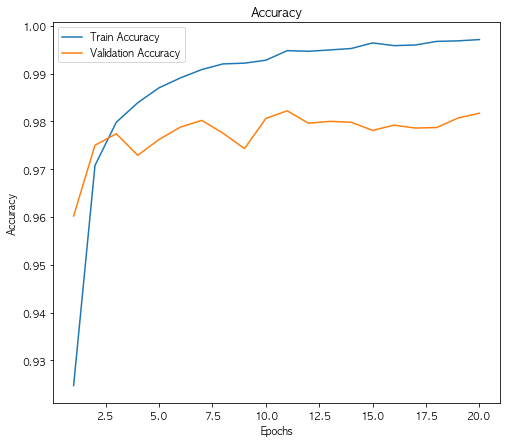

In [24]:
plot_accuracy(N_EPOCHS, hist)

## Dropout 적용
- layers.Dropout 객체를 이용
- dropout rate는 0.2 ~ 0.5 정도로 설정
    - 규제 강도는 rate를 크게 잡을 수록 커진다.
- dropout node를 가질 Layer 앞에 추가.

In [25]:
def create_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [26]:
dropout_model = create_dropout_model()
dropout_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [27]:
dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [28]:
hist = dropout_model.fit(train_dataset, 
                         epochs=N_EPOCHS+10, 
                         validation_data=test_dataset)

Epoch 1/30
  1/600 [..............................] - ETA: 4:11 - loss: 2.5488 - accuracy: 0.0400

2022-07-15 10:38:23.947102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


599/600 [============================>.] - ETA: 0s - loss: 0.6852 - accuracy: 0.7754

2022-07-15 10:38:30.562208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 8s 12ms/step - loss: 0.6845 - accuracy: 0.7756 - val_loss: 0.2065 - val_accuracy: 0.9382
Epoch 2/30
600/600 [==============================] - 8s 13ms/step - loss: 0.3208 - accuracy: 0.9021 - val_loss: 0.1671 - val_accuracy: 0.9491
Epoch 3/30
600/600 [==============================] - 8s 13ms/step - loss: 0.2631 - accuracy: 0.9199 - val_loss: 0.1266 - val_accuracy: 0.9630
Epoch 4/30
600/600 [==============================] - 8s 13ms/step - loss: 0.2279 - accuracy: 0.9307 - val_loss: 0.1163 - val_accuracy: 0.9638
Epoch 5/30
600/600 [==============================] - 8s 14ms/step - loss: 0.2115 - accuracy: 0.9361 - val_loss: 0.1068 - val_accuracy: 0.9681
Epoch 6/30
600/600 [==============================] - 9s 14ms/step - loss: 0.1960 - accuracy: 0.9413 - val_loss: 0.0989 - val_accuracy: 0.9703
Epoch 7/30
600/600 [==============================] - 7s 12ms/step - loss: 0.1830 - accuracy: 0.9443 - val_loss: 0.0947 - val_accuracy: 0.9722
Epoch 8/30

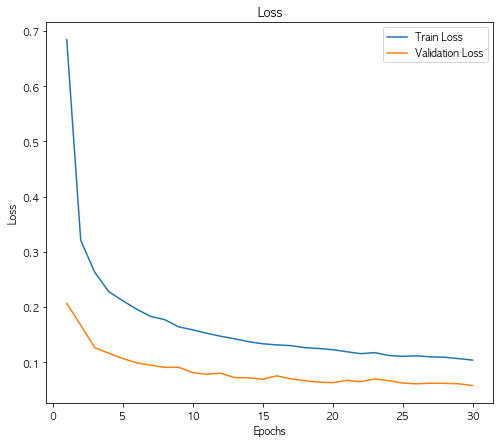

In [29]:
plot_loss(N_EPOCHS+10, hist)

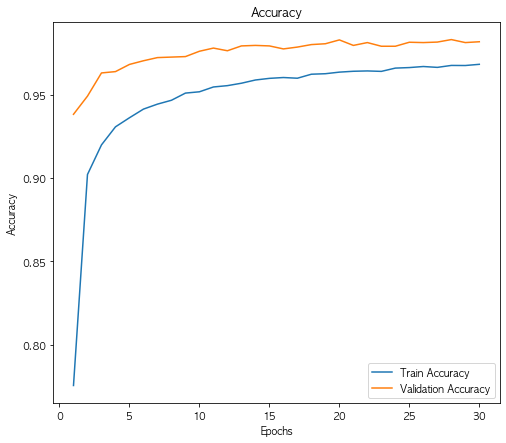

In [30]:
plot_accuracy(N_EPOCHS+10, hist)

## Batch Normalization
- Dense -> BN -> Activation  순서로 적용
> Dense Layer: 가중합 처리 (X@W +B)
> Dense(units=36) => 36개의 unit을 가지는 Dense Layer를 생성. 각 unit은 가중합 처리
> Dense(units=36, activation='relu')  => 36개의 unit들이 가중합 처리하고 그 결과를 처리하는 activation(relu) layer에 전달해서 처리.
> => Dense layer + Activation layer
- layers.BatchNormalization 사용

In [31]:
layer.softmax() # softmax
layer.Activation('sigmoid') # logistic(sigmoid)

NameError: name 'layer' is not defined

In [32]:
def create_bn_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=256)) # 가중합계산
    model.add(layers.BatchNormalization()) # Batch Normalization Layer - 평균:1+beta, 표준편차:1*gamma의 분포
    model.add(layers.ReLU()) # activation layer: relu
    
    # Dropout을 같이 사용하는 경우
    # Dropout - Dense - BatchNormalization - Activation
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # 출력
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Softmax())
    
    return model

In [33]:
bn_model = create_bn_model()
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [34]:
bn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                      

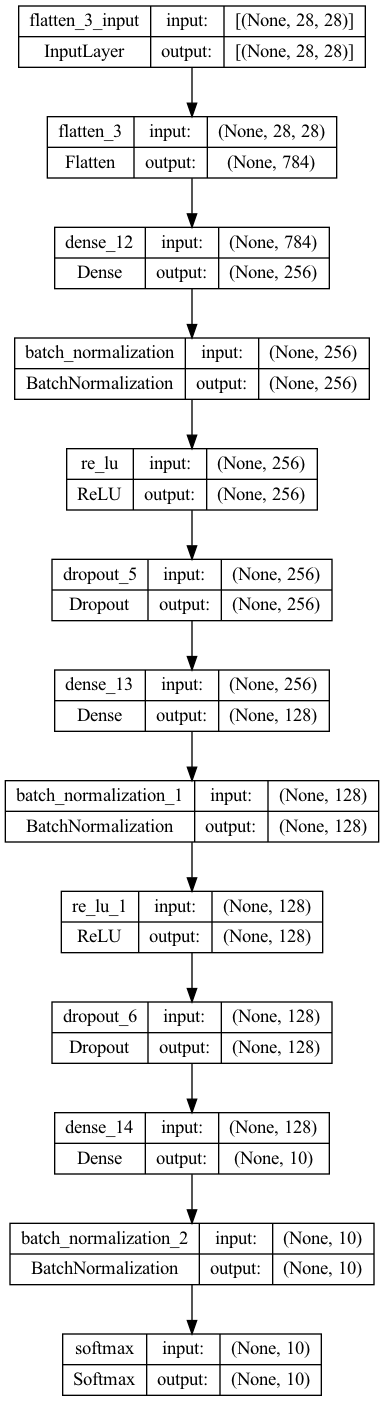

In [35]:
keras.utils.plot_model(bn_model, show_shapes=True)

In [ ]:
hist = bn_model.fit(train_dataset, epochs=N_EPOCHS,
                    validation_data=test_dataset)

In [ ]:
plot_loss(N_EPOCHS, hist)

In [ ]:
plot_accuracy(N_EPOCHS, hist)

## Learning Rate 조정을 이용한 성능향상

### Learning Rate Decay
- 일정한 step마다 일정 비율로 Learning rate를 조정

In [13]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [14]:
model = create_model()

In [15]:
len(train_dataset)*10  #10에폭의 step수

6000

In [16]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=LEARNING_RATE,
                    decay_steps=len(train_dataset)*5,
                    decay_rate=0.2,
                    staircase=True,
                    )

In [17]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(train_dataset, 
                 epochs=N_EPOCHS, 
                 validation_data=test_dataset)

Epoch 1/20
  9/600 [..............................] - ETA: 4s - loss: 1.9942 - accuracy: 0.3878  

2022-07-15 12:08:27.273874: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-15 12:08:27.274026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


598/600 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.9246

2022-07-15 12:08:31.998983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 6s 9ms/step - loss: 0.2516 - accuracy: 0.9248 - val_loss: 0.1202 - val_accuracy: 0.9615
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0964 - accuracy: 0.9709 - val_loss: 0.0869 - val_accuracy: 0.9733
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0625 - accuracy: 0.9809 - val_loss: 0.0936 - val_accuracy: 0.9719
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0715 - val_accuracy: 0.9779
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0821 - val_accuracy: 0.9752
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0146 - accuracy: 0.9959 - val_loss: 0.0586 - val_accuracy: 0.9827
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0085 - accuracy: 0.9982 - val_loss: 0.0596 - val_accuracy: 0.9822
Epoch 8/20
600/6

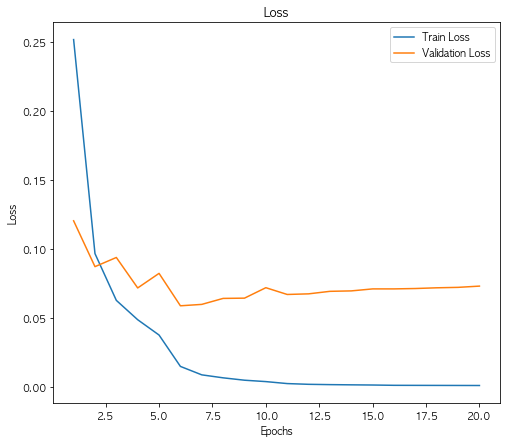

In [19]:
plot_loss(N_EPOCHS, hist)

### Callback 을 이용한 학습률 조정
- ReduceLROnPlateau callback을 이용
    - 학습시 성능이 개선이 안되는 경우 LR를 조정

In [20]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_cb = ReduceLROnPlateau(monitor='val_loss',
                          factor=0.2,
                          patience=3,
                          verbose=2) 

In [22]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, 
                 validation_data=test_dataset,
                 callbacks=[lr_cb])

Epoch 1/20
 17/600 [..............................] - ETA: 3s - loss: 1.6483 - accuracy: 0.5271

2022-07-15 12:14:07.199655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


596/600 [============================>.] - ETA: 0s - loss: 0.2552 - accuracy: 0.9240

2022-07-15 12:14:11.285012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 5s 7ms/step - loss: 0.2543 - accuracy: 0.9243 - val_loss: 0.1107 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0945 - accuracy: 0.9704 - val_loss: 0.0880 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 0.0797 - val_accuracy: 0.9754 - lr: 0.0010
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0746 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0696 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.0748 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0255 